## Problem Statement
The objective of this project is to predict whether a credit card client will default on their payment using historical financial and demographic data. This helps financial institutions minimize risk while making lending decisions.


<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Import Libraries</b></h1>
</div>

In [54]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

from imblearn.over_sampling import SMOTE
import joblib

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Load Dataset</b></h1>
</div>

In [55]:
df = pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Data Cleaning</b></h1>
</div>

In [56]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [57]:
# print("Shape before removing duplicates:", df.shape)

# df = df.drop_duplicates()

# print("Shape after removing duplicates:", df.shape)

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Feature Engineering</b></h1>
</div>

In [58]:
df["Avg_Bill_Amount"] = df[
    ["BILL_AMT1","BILL_AMT2","BILL_AMT3",
     "BILL_AMT4","BILL_AMT5","BILL_AMT6"]
].mean(axis=1)

df["Credit_Utilization"] = df["Avg_Bill_Amount"] / df["LIMIT_BAL"]

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Exploratory Data Analysis (EDA)</b></h1>
</div>

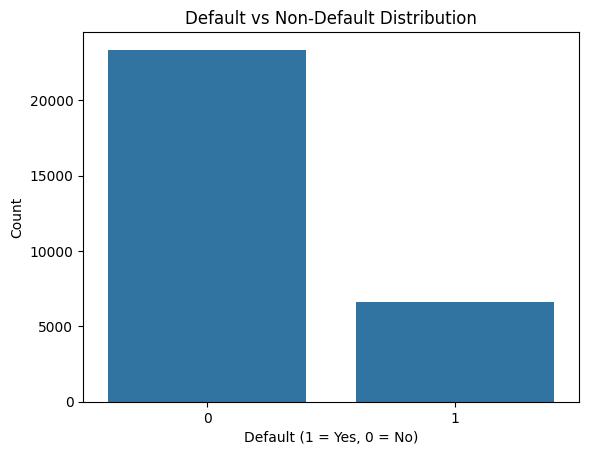

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [59]:
plt.figure()
sns.countplot(x="default.payment.next.month", data=df)
plt.title("Default vs Non-Default Distribution")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

print(df["default.payment.next.month"].value_counts(normalize=True))

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Train Test Split</b></h1>
</div>

In [60]:
X = df.drop(["default.payment.next.month","ID"], axis=1)
y = df["default.payment.next.month"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Handle Class Imbalance (SMOTE)</b></h1>
</div>

In [61]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_smote.value_counts())

Before SMOTE:
 default.payment.next.month
0    18691
1     5309
Name: count, dtype: int64
After SMOTE:
 default.payment.next.month
0    18691
1    18691
Name: count, dtype: int64


<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Feature Scaling</b></h1>
</div>

In [62]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Model Training</b></h1>
</div>

In [63]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_smote)

LogisticRegression(max_iter=1000)

In [64]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [200],
    "max_depth": [10]
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring="roc_auc")
grid.fit(X_train_smote, y_train_smote)

best_rf = grid.best_estimator_

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Model Evaluation</b></h1>
</div>

In [65]:
def evaluate(model, X_test_data, name):
    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:,1]

    print("\n", name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

evaluate(log_model, X_test_scaled, "Logistic Regression")
evaluate(best_rf, X_test, "Random Forest")


 Logistic Regression
Accuracy: 0.6916666666666667
Precision: 0.3734881470730527
Recall: 0.5817633760361718
F1: 0.45492044784914554
ROC-AUC: 0.6924234539485195

 Random Forest
Accuracy: 0.7691666666666667
Precision: 0.4813863928112965
Recall: 0.5651846269781462
F1: 0.5199306759098787
ROC-AUC: 0.7584586598024761


<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Model Performance Visualization</b></h1>
</div>

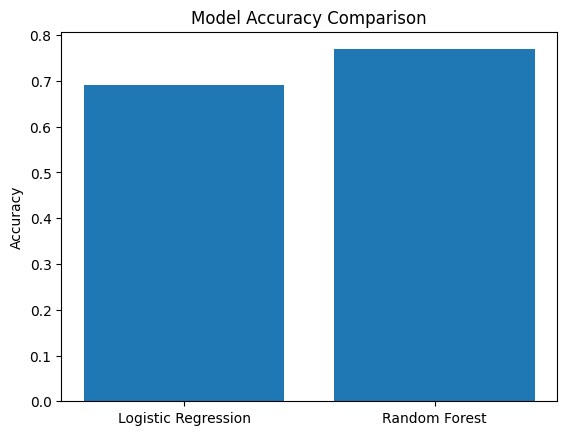

In [66]:
models = ["Logistic Regression", "Random Forest"]
accuracies = [
    accuracy_score(y_test, log_model.predict(X_test_scaled)),
    accuracy_score(y_test, best_rf.predict(X_test))
]

plt.figure()
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

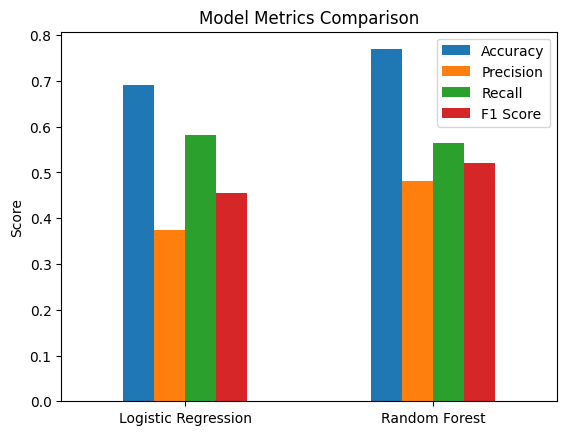

In [67]:
log_pred = log_model.predict(X_test_scaled)
rf_pred = best_rf.predict(X_test)

metrics = {
    "Accuracy": [
        accuracy_score(y_test, log_pred),
        accuracy_score(y_test, rf_pred)
    ],
    "Precision": [
        precision_score(y_test, log_pred),
        precision_score(y_test, rf_pred)
    ],
    "Recall": [
        recall_score(y_test, log_pred),
        recall_score(y_test, rf_pred)
    ],
    "F1 Score": [
        f1_score(y_test, log_pred),
        f1_score(y_test, rf_pred)
    ]
}

metrics_df = pd.DataFrame(metrics, index=models)

metrics_df.plot(kind="bar")
plt.title("Model Metrics Comparison")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.show()

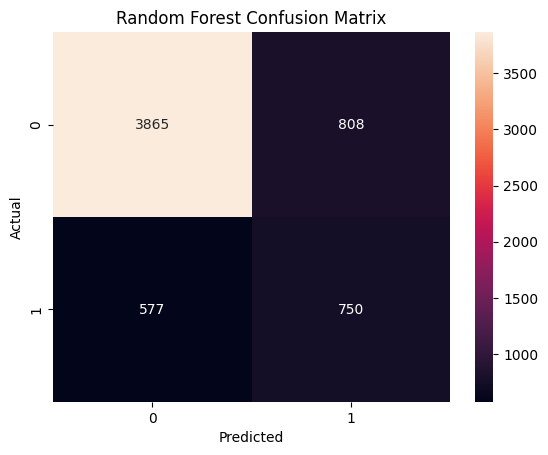

In [68]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

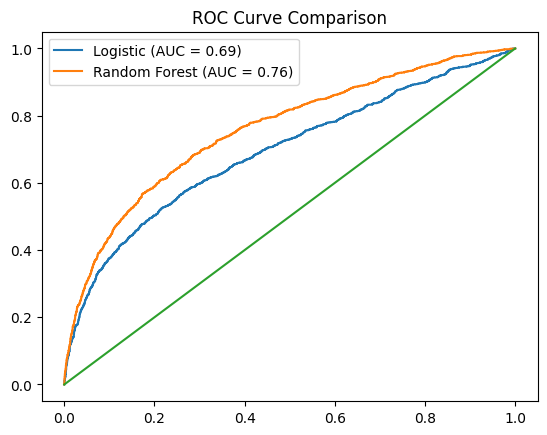

In [69]:
from sklearn.metrics import roc_curve, auc

log_prob = log_model.predict_proba(X_test_scaled)[:,1]
rf_prob = best_rf.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1],[0,1])
plt.legend()
plt.title("ROC Curve Comparison")
plt.show()

<div style = " background-color : #922cf2 ; font-size: 10px ; text-align : center ; color : white ; padding : 5px ; border-radius : 7px">
<h1><b> -->> Model Deployment Preparation</b></h1>
</div>

In [70]:
joblib.dump(best_rf, "credit_risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']